## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

In [1]:
import numpy as np
from scipy.spatial.distance import cdist
from scipy.optimize import minimize
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris, make_blobs
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

In [2]:
# 数据集
rng = np.random.RandomState(0)
X = np.random.random((20, 1))
y = 13.4 * X + 5 + rng.randint(-5, 5, size=(20, 1))
y = y.ravel()

In [3]:
# 完成线性回归模型
reg = LinearRegression()
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [4]:
# 进行预测新数据
pred = reg.predict([[0], [0.5], [1]])
print(pred)

[ 3.84881837 11.72971788 19.61061739]


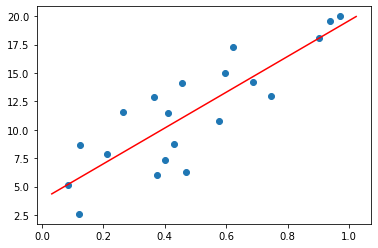

In [5]:
# 进行可视化操作
plt.figure()
plt.scatter(X.ravel(), y)
x1, x2 = plt.gca().get_xlim()
y1, y2 = reg.predict([[x1], [x2]])
plt.plot([x1, x2], [y1, y2], color="r")
plt.show()

#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

In [6]:
# 完成了KNN模型
class KNeighborsRegressor():
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self._fit_X = X
        self._y = y
        return self

    def predict(self, X):
        dist_mat = cdist(X, self._fit_X)
        neigh_ind = np.argsort(dist_mat, axis=1)[:, :self.n_neighbors]
        return np.mean(self._y[neigh_ind], axis=1)

In [7]:
# 预测新的数据 
reg = KNeighborsRegressor()
reg.fit(X, y)
pred = reg.predict([[0], [0.5], [1]])
print(pred)

[ 7.1690097  10.27661577 16.97147501]


#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

In [8]:
class TreeNode():
    def __init__(self):
        self.left_child = -1
        self.right_child = -1
        self.feature = None
        self.threshold = None
        self.impurity = None
        self.n_node = None
        self.value = None

In [9]:
class DecisionTreeClassifier():
    def __init__(self, max_depth=2):
        self.max_depth = max_depth

    # 实现了信息熵 
    def _entropy(self, y_cnt):
        prob = y_cnt / np.sum(y_cnt)
        prob = prob[prob > 0]
        return -np.sum(prob * np.log2(prob))

    # 实现了持续的特征选则
    def _build_tree(self, X, y, cur_depth, parent, is_left):
        if np.unique(X, axis=0).shape[0] == 1 or np.unique(y).shape[0] == 1 or cur_depth == self.max_depth:
            cur_node = TreeNode()
            cur_node.n_node = X.shape[0]
            cur_node.value = np.bincount(y, minlength=self.n_classes_)
            cur_node.impurity = self._entropy(cur_node.value)
            cur_id = len(self.tree_)
            self.tree_.append(cur_node)
            if parent is not None:
                if is_left:
                    self.tree_[parent].left_child = cur_id
                else:
                    self.tree_[parent].right_child = cur_id
            return
        # 实现了最优先特征点的选择
        best_improvement = -np.inf
        best_feature = None
        best_threshold = None
        best_left_ind = None
        best_right_ind = None
        y_cnt = np.bincount(y, minlength=self.n_classes_)
        for i in range(X.shape[1]):
            ind = np.argsort(X[:, i])
            y_cnt_left = np.bincount([], minlength=self.n_classes_)
            y_cnt_right = y_cnt.copy()
            n_left = 0
            n_right = X.shape[0]
            for j in range(ind.shape[0] - 1):
                y_cnt_left[y[ind[j]]] += 1
                y_cnt_right[y[ind[j]]] -= 1
                n_left += 1
                n_right -= 1
                if j + 1 < ind.shape[0] - 1 and np.isclose(X[ind[j], i], X[ind[j + 1], i]):
                    continue
                cur_improvement = -n_left * self._entropy(y_cnt_left) - n_right * self._entropy(y_cnt_right)
                if cur_improvement > best_improvement:
                    best_improvement = cur_improvement
                    best_feature = i
                    best_threshold = X[ind[j], i]
                    best_left_ind = ind[:j + 1]
                    best_right_ind = ind[j + 1:]
        cur_node = TreeNode()
        cur_node.feature = best_feature
        cur_node.threshold = best_threshold
        cur_node.n_node = X.shape[0]
        cur_node.value = y_cnt
        cur_node.impurity = self._entropy(y_cnt)
        cur_id = len(self.tree_)
        self.tree_.append(cur_node)
        if parent is not None:
            if is_left:
                self.tree_[parent].left_child = cur_id
            else:
                self.tree_[parent].right_child = cur_id
        if cur_depth < self.max_depth:
            self._build_tree(X[best_left_ind], y[best_left_ind], cur_depth + 1, cur_id, True)
            self._build_tree(X[best_right_ind], y[best_right_ind], cur_depth + 1, cur_id, False)

    def fit(self, X, y):
        self.n_features = X.shape[1]
        self.classes_, y_train = np.unique(y, return_inverse=True)
        self.n_classes_ = len(self.classes_)
        self.tree_ = []
        self._build_tree(X, y_train, 0, None, None)
        return self

    def apply(self, X):
        pred = np.zeros(X.shape[0], dtype=np.int)
        for i in range(X.shape[0]):
            cur_node = 0
            while self.tree_[cur_node].left_child != -1:
                if X[i][self.tree_[cur_node].feature] <= self.tree_[cur_node].threshold:
                    cur_node = self.tree_[cur_node].left_child
                else:
                    cur_node = self.tree_[cur_node].right_child
            pred[i] = cur_node
        return pred

    def predict(self, X):
        pred = self.apply(X)
        return np.array([self.classes_[np.argmax(self.tree_[p].value)] for p in pred])

In [10]:
X, y = load_iris(return_X_y=True)
X = X[:, [0, 1]]
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X, y)

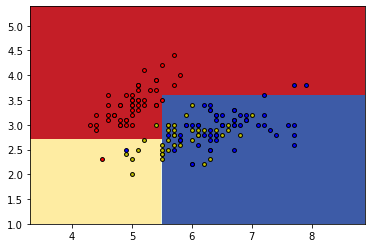

In [11]:
plt.figure()
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
for i, color in zip(range(3), "ryb"):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color,
                cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
plt.show()

#### 4. Finish the K-Means using 2-D matplotlib (8 points)

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

In [12]:
X, _ = make_blobs(random_state=42)
clust = KMeans(n_clusters=3)
clust.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

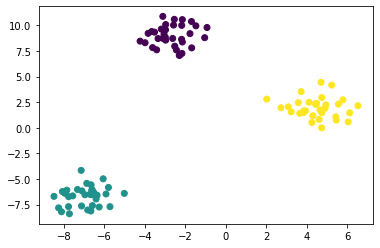

In [13]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=clust.labels_)
plt.show()

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans: 模型尝试自动化解决生活中的问题，所有的模型或多或少都有局限性，但是不影响其在特定场景下的实用性

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

Ans: 
- 欠拟合是指数据在训练数据上表现差，在测试数据上同样表现差，即模型没有充分拟合训练数据，常见原因是模型过于简单
- 过拟合是指数据在训练数据上表现好，在测试数据上表现差，即模型过分拟合训练数据，常见原因是模型国语复杂或数据过于缺乏

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

Ans: 
- 这些都是分类问题的指标，主要解决类别不均衡时accuracy失效的问题
- precision = TP / (TP + FP)
- recall = TP / (TP + FN)
- F1 = 2 * precision * recall / (precision + recall)
- F2 = 5 * precision * recall / (4 * precision + recall)
- AUC: ROC曲线下方面积，ROC曲线x轴FPR = FP / (TN + FP)，y轴TPR = TP / (TP + FN)

<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

Ans: 以自动化的方式解决生活中的问题

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

Ans: 正确，只有根据需求定义评价标准才能不断提升模型

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

In [14]:
## 前面的Re-code the Decision Tree已经实现了完整的DecisionTreeClassifier

In [15]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [16]:
X_train = pd.DataFrame(mock_data)
le1 = LabelEncoder().fit(X_train["gender"])
le2 = LabelEncoder().fit(X_train["income"])
X_train["gender"] = le1.transform(X_train["gender"])
X_train["income"] = le2.transform(X_train["income"])
y_train = np.array(X_train["bought"])
X_train = np.array(X_train[["gender", "income", "family_number"]])

In [17]:
X_train

array([[0, 0, 1],
       [0, 1, 1],
       [0, 0, 2],
       [0, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 1, 2]], dtype=int64)

In [18]:
y_train

array([1, 1, 1, 0, 0, 0, 1], dtype=int64)

In [19]:
clf = DecisionTreeClassifier(max_depth=np.inf)
clf.fit(X_train, y_train)

In [20]:
def predicate(gender, income, family_number):
    X_test = np.zeros((1, 3))
    X_test[0, 0] = le1.transform([gender])[0]
    X_test[0, 1] = le2.transform([income])[0]
    X_test[0, 2] = family_number
    return clf.predict(X_test)[0]

In [21]:
predicate("M", "-10", 1)

1

<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

In [22]:
class LinearRegression():
    def fit(self, X, y):
        X_mean = np.mean(X, axis=0)
        y_mean = np.mean(y)
        X_train = X - X_mean
        y_train = y - y_mean
        theta = np.zeros(X_train.shape[1])
        res = minimize(fun=cost_gradient, jac=True, x0=theta,
                       args=(X_train, y_train), method='L-BFGS-B')
        self.coef_ = res.x
        self.intercept_ = y_mean - np.dot(X_mean, self.coef_)
        return self

    def predict(self, X):
        y_pred = np.dot(X, self.coef_) + self.intercept_
        return y_pred

$$L = \frac{1}{2m}\sum_{i=1}^{n}{(w^Tx_i - y_i)^2}$$

$$\frac{\partial L}{\partial w} = \frac{1}{m}\sum_{i=1}^{n}{(w^Tx_i-y_i)x_i}$$

In [23]:
# 线性回归常用Loss
def cost_gradient(theta, X, y):
    h = np.dot(X, theta) - y
    J = np.dot(h, h) / (2 * X.shape[0])
    grad = np.dot(X.T, h) / X.shape[0]
    return J, grad

[ 5.87752404 11.72916058 17.58079713]


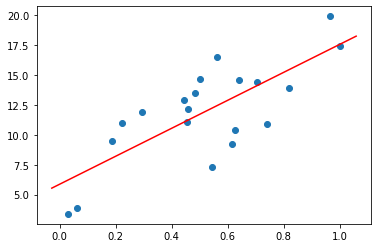

In [24]:
# 数据集
rng = np.random.RandomState(0)
X = np.random.random((20, 1))
y = 13.4 * X + 5 + rng.randint(-5, 5, size=(20, 1))
y = y.ravel()
# 完成线性回归模型
reg = LinearRegression()
reg.fit(X, y)
# 进行预测新数据
pred = reg.predict([[0], [0.5], [1]])
print(pred)
# 进行可视化操作
plt.figure()
plt.scatter(X.ravel(), y)
x1, x2 = plt.gca().get_xlim()
y1, y2 = reg.predict([[x1], [x2]])
plt.plot([x1, x2], [y1, y2], color="r")
plt.show()

$$L = \frac{1}{m}\sum_{i=1}^{n}{|w^Tx_i - y_i|}$$

$$\frac{\partial L}{\partial w} = \frac{1}{m}\sum_{i=1}^{n}{sign(w^Tx_i-y_i)x_i}$$

In [25]:
# 线性回归绝对值Loss
def cost_gradient(theta, X, y):
    h = np.dot(X, theta) - y
    J = np.abs(h) / X.shape[0]
    grad = np.dot(X.T, np.sign(h)) / X.shape[0]
    return J, grad

[ 3.56790065 11.91543019 20.26295972]


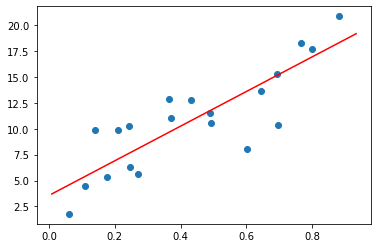

In [26]:
# 数据集
rng = np.random.RandomState(0)
X = np.random.random((20, 1))
y = 13.4 * X + 5 + rng.randint(-5, 5, size=(20, 1))
y = y.ravel()
# 完成线性回归模型
reg = LinearRegression()
reg.fit(X, y)
# 进行预测新数据
pred = reg.predict([[0], [0.5], [1]])
print(pred)
# 进行可视化操作
plt.figure()
plt.scatter(X.ravel(), y)
x1, x2 = plt.gca().get_xlim()
y1, y2 = reg.predict([[x1], [x2]])
plt.plot([x1, x2], [y1, y2], color="r")
plt.show()

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)